## Setup

In [5]:
import os
import numpy as np
import pandas
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from PIL import Image
import matplotlib.pyplot as plt
import scikitplot as skplt
import pickle

In [6]:
path = os.getcwd() + "/../dataset/"
res = "360"

trainX = np.load(path + "train/trainSamples-"+res+"-withColour.npy")
trainY = np.load(path + "train/trainLabels.npy").astype("int")
testX = np.load(path + "test/testSamples-"+res+"-withColour.npy")
testY = np.load(path + "test/testLabels.npy").astype("int")

In [9]:
unique, counts = np.unique(trainY, return_counts=True)
dict(zip(unique,counts))

{0: 348, 1: 352}

## Testing SVM models of different k

linear: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00        95

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

True


IndexError: too many indices for array

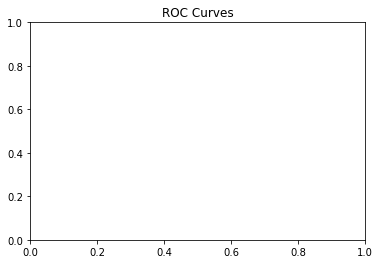

In [11]:
kernelTypes = ["linear", "poly", "rbf"]

for k in kernelTypes:
    svc = SVC(kernel=k)
    svc.fit(trainX,trainY)
    
    predY = svc.predict(testX)

    print(k + ": " + str(svc.score(testX,testY)))
    print(classification_report(testY, predY))

    pickle.dump(svc, open(k+"-SVM-model.pkl","wb"))
    
    print(len(testY) == len(predY))
    skplt.metrics.plot_roc(testY, predY)
    
plt.show()

## Testing photos

In [ ]:
kernelTypes = ["linear", "poly", "rbf"]

arr = np.empty((2,480*360))
arr[0,:] = np.asarray(Image.open("/home/hwixley/Downloads/image.png").resize((480,360)))[:,:,0].reshape(1,-1)
arr[1,:] = np.asarray(Image.open("/home/hwixley/Downloads/image2.png").resize((480,360)))[:,:,0].reshape(1,-1)

for k in kernelTypes:
    svc = SVC(kernel=k)
    svc.fit(trainX,trainY)
    
    print(svc.predict(arr))

In [3]:
svc = SVC(kernel="rbf")
svc.fit(trainX,trainY)

SVC()

## Import a model

In [10]:
import pandas as pd

model = pd.read_pickle(os.getcwd() + "/../model-pickle-files/poly-SVM-model.pkl")

## Test model against video frames

In [11]:
import cv2
import time

cam = cv2.VideoCapture("/home/hwixley/Downloads/vid.mp4")

succ, frames = cam.read()

while succ:
    im = Image.fromarray(frames[:,:,0])
    im = im.resize((640,360))
    
    frame = np.asarray(im).reshape(1,-1)

    pred = model.predict(frame)[0]
    print(pred)
    
    #if pred == 1:
        #im.show()
        #time.sleep(1)

    succ, frames = cam.read()

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


KeyboardInterrupt: 